# Breast Cancer
## Breast Tumor Mammography Dataset for Computer Vision



This dataset contains 3,383 mammogram images focused on breast tumors, annotated in a folder structure.
The dataset was exported from Roboflow, a platform for computer vision projects.
It is ideal for building and testing Deep-learning models aimed at detecting breast tumors through mammograms.

## Model VGG

# Imported Necessary Python Libraries

In [1]:
import os                                  # For operating system functionalities
import tensorflow as tf                     # TensorFlow for deep learning
import keras                                # Keras for building neural networks
from keras import layers                    # Keras layers for model construction
from tensorflow.keras import callbacks       # Callbacks for model training

# For image data generation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt             # For plotting
from matplotlib.image import imread         # For reading images

import numpy as np                          # NumPy for numerical operations
import pandas as pd                         # Pandas for data manipulation and analysis

import seaborn as sns                       # Seaborn for enhanced visualizations

# For performance metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings                             # For warning management
warnings.filterwarnings('ignore')          # Ignore warnings for cleaner output


### Mounts Google Drive to access files and datasets stored in the Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Unzipping the Main folder of Images

In [ ]:
# !unzip file_location
!unzip /content/drive/MyDrive/archive.zip

### This setting reduces TensorFlow logging output to only show errors.

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

### This function to display images from training folders, visualizes up to 16 images per class, and prints the number of images in each folder to help explore the dataset.


Number of samples in 0 class is 1569



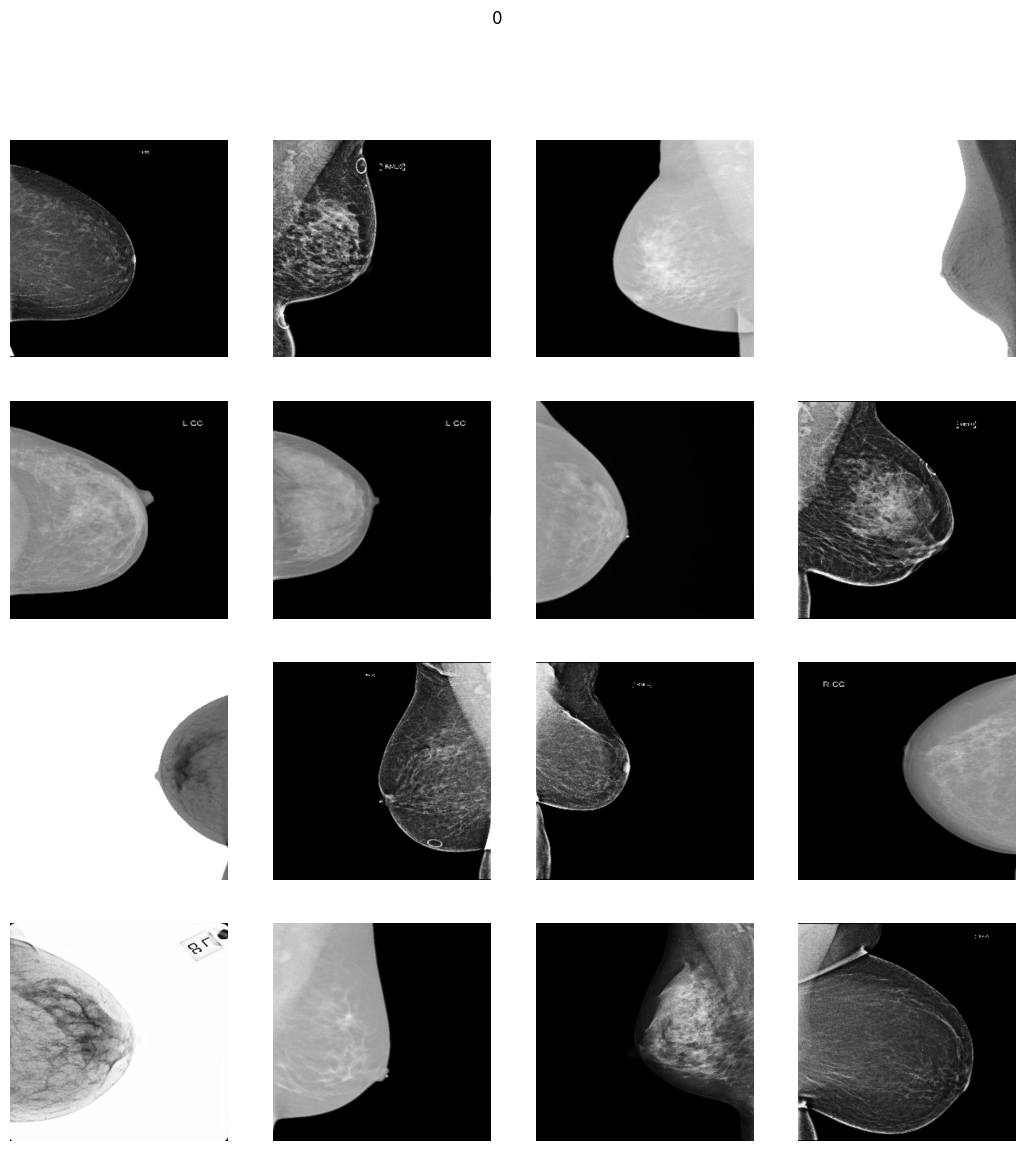



Number of samples in 1 class is 803



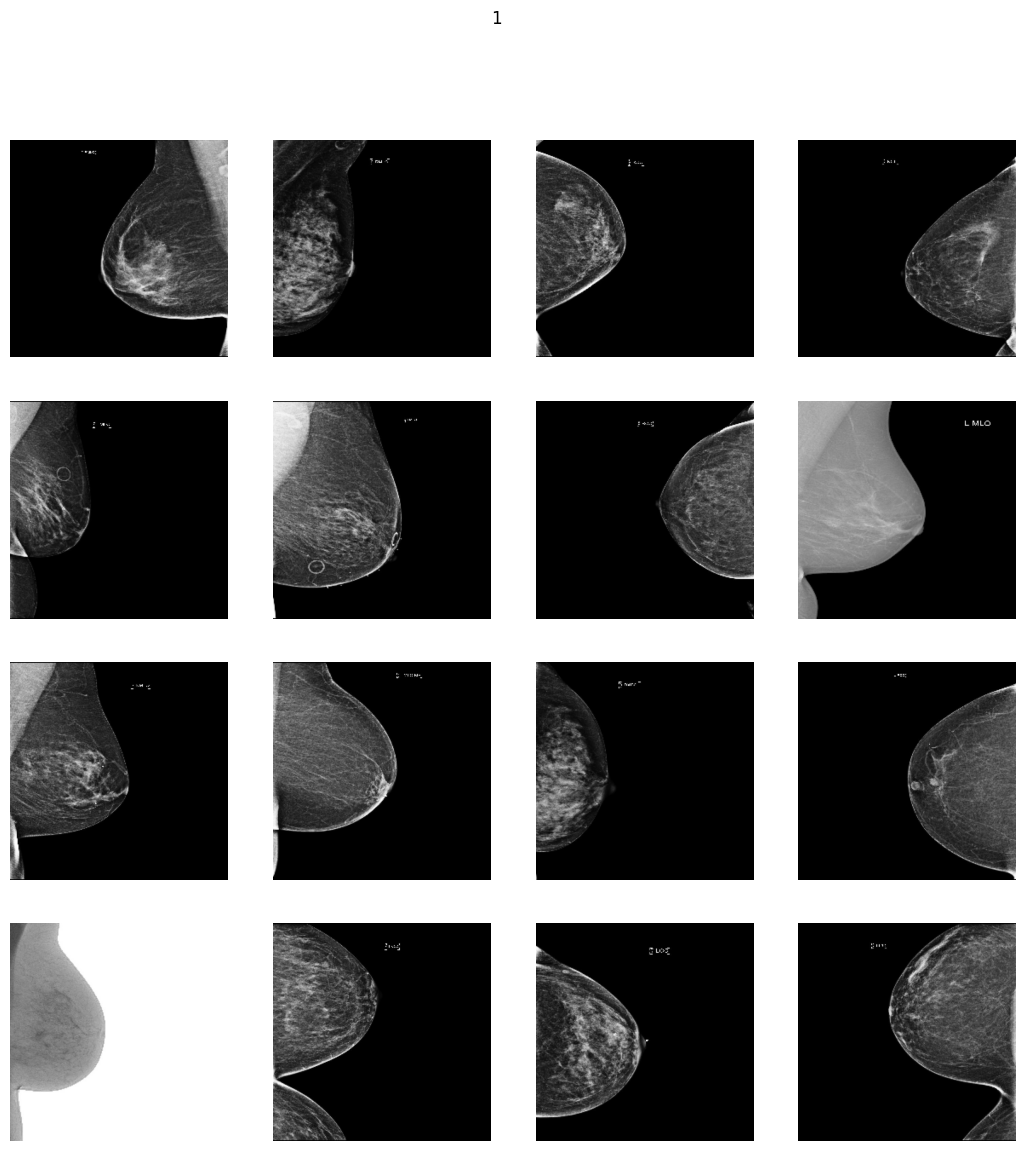

In [5]:
def display_images_in_folders(train_folders, train_path):
    for folder in train_folders:
        folder_path = os.path.join(train_path, folder)
        filenames = os.listdir(folder_path)

        print('Number of samples in {} class is {}\n'.format(folder, len(filenames)))

        fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(13, 13))

        for i in range(min(16, len(filenames))):
            plt.subplot(4, 4, i + 1)
            filepath = os.path.join(folder_path, filenames[i])
            image = imread(filepath)
            plt.imshow(image)
            plt.axis('off')
            plt.xticks([0, image.shape[0]])
            plt.yticks([0, image.shape[1]])

        plt.suptitle(folder.capitalize())
        plt.show()
        print('\n')

train_folders = ['0', '1']
train_path = "/content/train/"
display_images_in_folders(train_folders, train_path)


### The below code sets up an image data generator to load training, testing, and validation images in grayscale, rescaling them for model input, and iterates through batches to display image shapes and labels.


In [6]:
IMAGE_DIR = "/content/"
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 16
SEED_NUMBER = 43

gen_args = dict(
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary',
    seed=SEED_NUMBER
)


data_gen = ImageDataGenerator(rescale=1./255)
train_data = data_gen.flow_from_directory(directory=IMAGE_DIR + 'train', shuffle=True, **gen_args)
test_data = data_gen.flow_from_directory(directory=IMAGE_DIR + 'test', shuffle=True, **gen_args)
valid_data = data_gen.flow_from_directory(directory=IMAGE_DIR + 'valid', shuffle=True, **gen_args)


Found 2372 images belonging to 2 classes.
Found 336 images belonging to 2 classes.
Found 675 images belonging to 2 classes.


## Define VGG-style Model

In [7]:
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=IMAGE_SIZE + (1,)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


### Compile the Model

In [8]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])


### Early stopping callback

In [9]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## Train the model

In [10]:
history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks=early_stopping,
                    verbose=1)

Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 38s 164ms/step - accuracy: 0.6341 - loss: 0.6746 - val_accuracy: 0.6637 - val_loss: 0.6408
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.6626 - loss: 0.6397 - val_accuracy: 0.6637 - val_loss: 0.6383
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6602 - loss: 0.6390 - val_accuracy: 0.6637 - val_loss: 0.6380
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.6607 - loss: 0.6397 - val_accuracy: 0.6637 - val_loss: 0.6360
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.6667 - loss: 0.6340 - val_accuracy: 0.6637 - val_loss: 0.6343
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.6545 - loss: 0.6379 - val_accuracy: 0.6637 - val_loss: 0.6327
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.6788 - loss: 0.6192 - val_accuracy: 0.6637 - val_loss: 0.6345
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.6554 - loss: 0

### Visualize training history

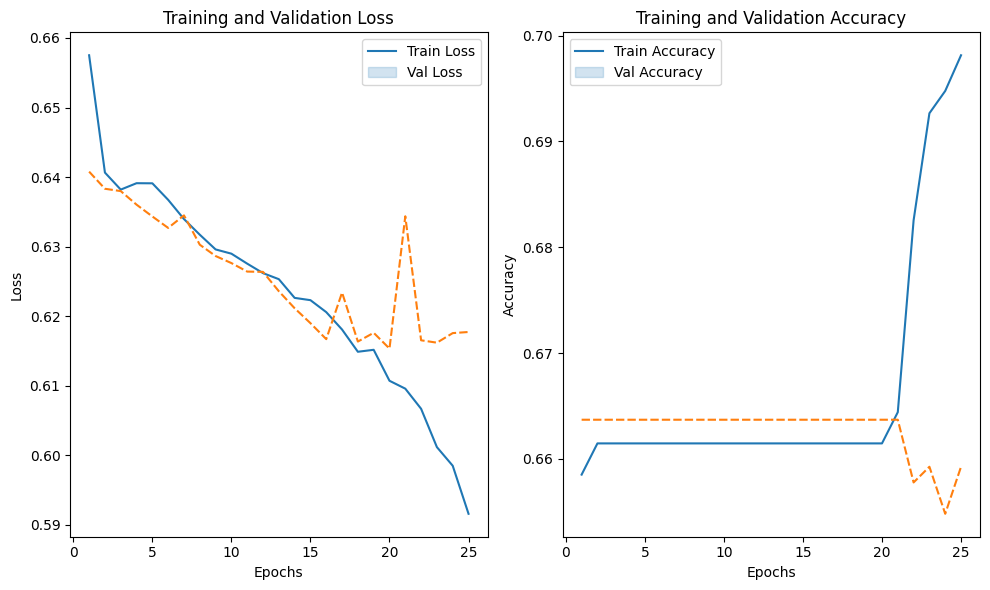

In [11]:
history = model.history.history

df_history = pd.DataFrame(history, index=range(1, 1 + len(history['loss'])))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_history[['loss', 'val_loss']])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels=['Train Loss', 'Val Loss'])

plt.subplot(1, 2, 2)
sns.lineplot(data=df_history[['accuracy', 'val_accuracy']])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Train Accuracy', 'Val Accuracy'])

plt.tight_layout()
plt.show()

## Model evaluation function

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.76       208
           1       0.00      0.00      0.00       128

    accuracy                           0.62       336
   macro avg       0.31      0.50      0.38       336
weighted avg       0.38      0.62      0.47       336



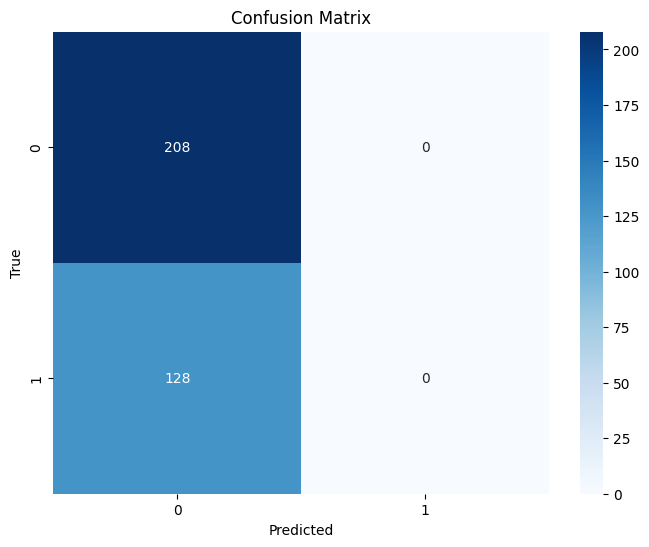

In [12]:
def evaluate_model(model, test_dataset, class_names):
    predictions = model.predict(test_dataset)
    predicted_labels = (predictions > 0.5).astype(int)
    true_labels = test_dataset.classes

    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    print("Classification Report:\n", report)

    cm = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

class_names = ["0", "1"]
evaluate_model(model, test_data, class_names)
